# Aviation accidents
## About Dataset:
The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.
## Project overview
Using incident data from the this dataset to identify risk factors regarding various aircrafts in the dataset. This is to be used identfy the lowest risk aircraft that can be used upon entering the aviation market, with a particular focus on the private and commercial sector

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Importing data and creating dataframes

In [2]:
# Import data into dataframe and preview
df1 = pd.read_csv('Data/AviationData.csv', encoding='latin1')
df1.head()

/Users/georgenyangaya/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Import and preview second set of data
df2 = pd.read_csv('Data/USState_Codes.csv')
df2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


# Previewing Dataframes

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
df1.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
# Checking for duplicated rows
print(df1.duplicated().value_counts())

False    88889
dtype: int64


# Checking for extraneous/erronous values
In this section, we are looking for data that isn't an accurate represention of what is being analysed. This ranges from mispelled categories to values that are too extreme to be realistic

In [7]:
# Check for extraneous/erronous values
for col in df1.columns:
    print(col, '\n', df1[col].value_counts(normalize=True).sort_values(ascending=False).head(10), '\n', df1[col].value_counts(normalize=True).sort_values().head(10),'\n\n')

Event.Id 
 20001212X19172    0.000034
20001214X45071    0.000034
20020917X02558    0.000022
20020917X02935    0.000022
20001213X29404    0.000022
20001214X39166    0.000022
20001213X25232    0.000022
20001213X30271    0.000022
20001213X26438    0.000022
20001213X35091    0.000022
Name: Event.Id, dtype: float64 
 20001214X40388    0.000011
20070703X00865    0.000011
20001213X33198    0.000011
20001206X01455    0.000011
20190627X10605    0.000011
20001208X06094    0.000011
20001213X30041    0.000011
20020917X04705    0.000011
20140819X50947    0.000011
20001213X27531    0.000011
Name: Event.Id, dtype: float64 


Investigation.Type 
 Accident    0.956418
Incident    0.043582
Name: Investigation.Type, dtype: float64 
 Incident    0.043582
Accident    0.956418
Name: Investigation.Type, dtype: float64 


Accident.Number 
 ERA22LA364    0.000022
DCA22WA167    0.000022
DCA22WA204    0.000022
DCA22WA158    0.000022
ERA22LA103    0.000022
WPR22LA201    0.000022
DCA22WA172    0.000022
CEN23MA034 

Purpose.of.flight 
 Personal              0.597942
Instructional         0.128191
Unknown               0.082252
Aerial Application    0.056979
Business              0.048587
Positioning           0.019904
Other Work Use        0.015285
Ferry                 0.009819
Aerial Observation    0.009601
Public Aircraft       0.008706
Name: Purpose.of.flight, dtype: float64 
 PUBL                       0.000012
PUBS                       0.000048
ASHO                       0.000073
Air Drop                   0.000133
Firefighting               0.000484
Glider Tow                 0.000641
Air Race/show              0.000713
Public Aircraft - State    0.000774
Public Aircraft - Local    0.000895
Air Race show              0.001197
Name: Purpose.of.flight, dtype: float64 


Air.carrier 
 Pilot                      0.015497
American Airlines          0.005406
United Airlines            0.005346
Delta Air Lines            0.003184
SOUTHWEST AIRLINES CO      0.002523
DELTA AIR LINES INC        0.00

Publication.Date 
 25-09-2020    0.226564
26-09-2020    0.023550
03-11-2020    0.015376
31-03-1993    0.006017
25-11-2003    0.005272
15-02-2001    0.005005
13-09-2005    0.004313
14-09-1993    0.004153
09-11-1992    0.003741
02-03-2001    0.003674
Name: Publication.Date, dtype: float64 
 01-04-2021    0.000013
12-08-2002    0.000013
14-05-2008    0.000013
25-03-2009    0.000013
06-06-2019    0.000013
23-12-2010    0.000013
04-09-2007    0.000013
14-03-1994    0.000013
20-04-1998    0.000013
22-03-2006    0.000013
Name: Publication.Date, dtype: float64 




From the data above, we have identified a few columns that are worth examining deeper for extraneous/erroneous values

### Columns to check
- Airport name
- Injury Severity 
- Aircraft.Category 
- Registration.Number
- Make
- Engine.Type 
- FAR.Description
- Purpose.of.flight
- Air.carrier 
- Weather.Condition

In [8]:
columns_to_check = ['Airport.Name', 'Injury.Severity', 'Aircraft.Category', 'Registration.Number', 'Make', 
                    'Engine.Type', 'FAR.Description', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition']

In [9]:
for col in columns_to_check:
    print(f'column: {col}')
    print(df1[col].value_counts())

column: Airport.Name
Private                           240
PRIVATE                           224
Private Airstrip                  153
NONE                              146
PRIVATE STRIP                     111
                                 ... 
VASHON MUNICIPAL                    1
SONOMA SKYPARK AIRPORT              1
St. Pete-Clearwater Internatio      1
Calaveras CO-Maury Rasmussen        1
George Bryan Airport                1
Name: Airport.Name, Length: 24871, dtype: int64
column: Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(256)        1
Fatal(123)        1
Fatal(107)        1
Fatal(37)         1
Fatal(96)         1
Name: Injury.Severity, Length: 109, dtype: int64
column: Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultra

## Simple fixes:
Title: Airport.Name, Make, Air.carrier

Upper: Weather.Condition, Registration.Number

Replace unknowns: Aircraft.Category, Registration.Number, Engine.Type

Replace values: Injury.Severity, Purpose.of.flight, FAR.Description

In [10]:
# Create a copy of df1 to clean data
df1_clean = df1.copy()

In [11]:
# Title
df1_clean['Airport.Name'] = df1_clean['Airport.Name'].str.title()
df1_clean['Make'] = df1_clean['Make'].str.title()
df1_clean['Air.carrier'] = df1_clean['Air.carrier'].str.title()

# Upper
df1_clean['Weather.Condition'] = df1_clean['Weather.Condition'].str.upper()

# Replace unknowns
df1_clean['Aircraft.Category'] = df1_clean['Aircraft.Category'].replace('UNK','Unknown')
df1_clean['Engine.Type'] = df1_clean['Engine.Type'].str.title().replace(['None','Unk'],'Unknown')
df1_clean['Registration.Number'] = df1_clean['Registration.Number'].str.upper().replace(['NONE','UNK','UNREG'],'UNKNOWN')

# Replacing 'Fatal(*)' with 'Fatal' for ['Injury.Severity']
df1_clean['Injury.Severity'] = df1_clean['Injury.Severity'].apply(lambda x: 'Fatal' if str(x).startswith('Fatal') else x)

# Replacing values in Purpose.of.flight
df1_clean['Purpose.of.flight'] = df1_clean['Purpose.of.flight'].replace('Air Race show','Air Race/show')
df1_clean['Purpose.of.flight'] = df1_clean['Purpose.of.flight'].replace('PUBS','Public Aircraft - State')
df1_clean['Purpose.of.flight'] = df1_clean['Purpose.of.flight'].replace('PUBL','Public Aircraft - Local')

# Replacing values in FAR.description
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('UNK','Unknown')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('091','Part 91: General Aviation')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('NUSN','Non-U.S., Non-Commercial')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('NUSC','Non-U.S., Commercial')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('137','Part 137: Agricultural')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('135','Part 135: Air Taxi & Commuter')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('121','Part 121: Air Carrier')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('129','Part 129: Foreign')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('133','Part 133: Rotorcraft Ext. Load')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('125','Part 125: 20+ Pax,6000+ lbs')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('ARMF','Armed Forces')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('PUBU','Public Use')
df1_clean['FAR.Description'] = df1_clean['FAR.Description'].replace('091K','Part 91 Subpart K: Fractional')

In [12]:
# Rechecking for extraneous/erronous values in 'Columns to check'
for col in columns_to_check:
    print(f'column: {col}')
    print(df1_clean[col].value_counts(normalize=True))

column: Airport.Name
Private                           0.008922
Private Airstrip                  0.005039
None                              0.004395
Private Strip                     0.003050
Merrill Field                     0.002065
                                    ...   
Gonzales                          0.000019
Juana Azurduy De Padilla Int'L    0.000019
Tallahasse Regional Airport       0.000019
Burlington-Alamance Regional A    0.000019
Barkley Rgnl                      0.000019
Name: Airport.Name, Length: 21566, dtype: float64
column: Injury.Severity
Non-Fatal      0.766387
Fatal          0.202824
Incident       0.025248
Minor          0.002480
Serious        0.001968
Unavailable    0.001092
Name: Injury.Severity, dtype: float64
column: Aircraft.Category
Airplane             0.855360
Helicopter           0.106544
Glider               0.015734
Balloon              0.007155
Gyrocraft            0.005358
Weight-Shift         0.004987
Powered Parachute    0.002818
Ultralight    

# Missing Data
The next step is to deal with null values within the data set

In [13]:
# Check for missing values
df1_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

### Plan for null values
'Location' = replace with Unknown

'Country' = replace with Unknown

'Latitude' = ignore column

'Longitude' = ignore column

'Airport.Code' = replace with Unknown

'Airport.Name' = replace with Unknown 

'Injury.Severity' = replace with Unknown 

'Aircraft.damage' = replace with Unknown

'Aircraft.Category' = replace with Unknown

'Registration.Number' = replace with Unknown

'Make' = replace with Unknown 

'Model' = replace with Unknown

'Amateur.Built' = replace with Mode 

'Number.of.Engines' = replace with Median

'Engine.Type' = replace with Unknown 

'FAR.Description' = replace with Unknown

'Schedule' = ignore column

'Purpose.of.flight' = replace with Unknown 

'Air.carrier' = ignore column

'Total.Fatal.Injuries' = replace with 0

'Total.Serious.Injuries' = replace with 0 

'Total.Minor.Injuries' = replace with 0

'Total.Uninjured' = replace with 0

'Weather.Condition' = replace with Unknown 

'Broad.phase.of.flight' = replace with Unknown 

'Report.Status' = replace with Unknown 

'Publication.Date' = drop column

In [14]:
# fill null values
df1_clean.fillna({
    'Location': 'Unknown',
    'Country': 'Unknown',
    'Airport.Code': 'Unknown',
    'Airport.Name': 'Unknown', 
    'Injury.Severity': 'Unknown',
    'Aircraft.damage': 'Unknown',
    'Aircraft.Category': 'Unknown',
    'Registration.Number': 'Unknown',
    'Make': 'Unknown',
    'Model': 'Unknown',
    'Amateur.Built': df1_clean['Amateur.Built'].mode()[0],
    'Number.of.Engines': df1_clean['Number.of.Engines'].median(),
    'Engine.Type': 'Unknown',
    'FAR.Description': 'Unknown',
    'Purpose.of.flight': 'Unknown', 
    'Total.Fatal.Injuries': 0,
    'Total.Serious.Injuries': 0, 
    'Total.Minor.Injuries': 0,
    'Total.Uninjured': 0,
    'Weather.Condition': 'Unknown', 
    'Broad.phase.of.flight': 'Unknown', 
    'Report.Status': 'Unknown'
}, inplace=True)

In [15]:
# Drop unneeded columns
df1_clean = df1_clean.drop(columns = ['Latitude','Longitude','Schedule','Air.carrier','Publication.Date'])

In [16]:
# Recheck for missing values
df1_clean.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

### Adding flight category column
Due to the focus being on buying planes for private and commercial use it would be useful to also categorise flights in these bins for further analysis.

These categories will stem from the Purpose.of.flight column as shown below:
1. Private:
- Personal
- Executive/Corporate
- Business
- Skydiving
- Air Race/Show
- Glider Tow
- ASHO
2. Commercial:
- Aerial Application
- Aerial Observation
- Banner Tow
- External Load
- Ferry
- Air Drop
3. Public/Government:
- Public Aircraft
- Public Aircraft - Federal
- Public Aircraft - Local
- Public Aircraft - State
- Firefighting
4. Other:
- Instructional
- Flight Test
- Positioning
- Other Work Use
5. Unknown:
- Unknown

In [17]:
Flight_category = []

private = ['Personal', 'Executive/corporate', 'Business', 'Skydiving', 'Air Race/show', 'Glider Tow', 'ASHO']
commercial =['Aerial Application', 'Aerial Observation', 'Banner Tow', 'External Load', 'Ferry', 'Air Drop']
public = ['Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - Local', 'Public Aircraft - State', 'Firefighting']

for item in df1_clean['Purpose.of.flight']:
    if item in private:
        Flight_category.append('Private')
    elif item in commercial:
        Flight_category.append('Commercial')
    elif item in public:
        Flight_category.append('Public')
    elif item == 'Unknown':
        Flight_category.append('Unknown')
    else:
        Flight_category.append('Other')
        
df1_clean['Flight.category'] = Flight_category
# Picking a random sample from the two to confirm it worked as expected
df1_clean.loc[600:650,['Flight.category','Purpose.of.flight']]

,Flight.category,Purpose.of.flight
600,Private,Personal
601,Private,Business
602,Other,Instructional
603,Private,Business
604,Commercial,Aerial Application
605,Unknown,Unknown
606,Private,Personal
607,Unknown,Unknown
608,Private,Personal
609,Private,Business


**Exporting the data**

Now that the data has been cleaned, exploratory data analysis can be formed. But first this cleaned data will be exported to allow for its use on an interactive Tableau Dashboard.

In [18]:
# Save the DataFrame to a CSV file
df1_clean.to_csv('cleaned.csv')

# Exploratory Data Analysis (EDA)

In [19]:
# Preview clean dataframe
df1_clean.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Flight.category
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal,Destroyed,...,Unknown,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Private
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal,Destroyed,...,Unknown,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,Private
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal,Destroyed,...,Unknown,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Private
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal,Destroyed,...,Unknown,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Private
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal,Destroyed,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,Private
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Unknown,Unknown,Non-Fatal,Substantial,...,Part 129: Foreign,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,Unknown
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Unknown,Unknown,Fatal,Destroyed,...,Unknown,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,Private
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Unknown,Blackburn Ag Strip,Non-Fatal,Substantial,...,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,Private
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,Hanover,Non-Fatal,Substantial,...,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,Private
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,Jacksonville Intl,Non-Fatal,Substantial,...,Unknown,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,Private


## Basic EDA
### Incidents by make

In [20]:
# Selecting top 10 aircraft makes by frequency of incidents
df1_clean['Make'].value_counts(normalize = True)[0:10]

Cessna      0.305426
Piper       0.167287
Beech       0.060435
Boeing      0.030881
Bell        0.030622
Mooney      0.015007
Robinson    0.013837
Grumman     0.013185
Bellanca    0.011756
Hughes      0.010485
Name: Make, dtype: float64

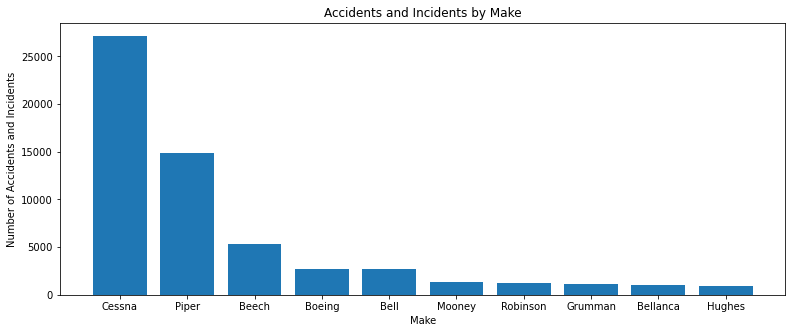

In [21]:
# Plotting barchart for this data
fig, ax = plt.subplots(figsize = (13,5))
ax.bar(x = df1_clean['Make'].value_counts()[0:10].index, height=df1_clean['Make'].value_counts()[0:10])
ax.set_title('Accidents and Incidents by Make')
ax.set_xlabel('Make')
ax.set_ylabel('Number of Accidents and Incidents');

Cessna's are the make most common reported to have an incident. However, since we only have incident data we can't assume this means it's the most risky aircraft. It is more likely an indicator of the frequency of the aircraft's use

### Incidents by Aircraft.damage

In [22]:
# Frequency of incidents by aircraft damage
df1_clean['Aircraft.damage'].value_counts(normalize = True)

Substantial    0.721664
Destroyed      0.209508
Unknown        0.037271
Minor          0.031556
Name: Aircraft.damage, dtype: float64

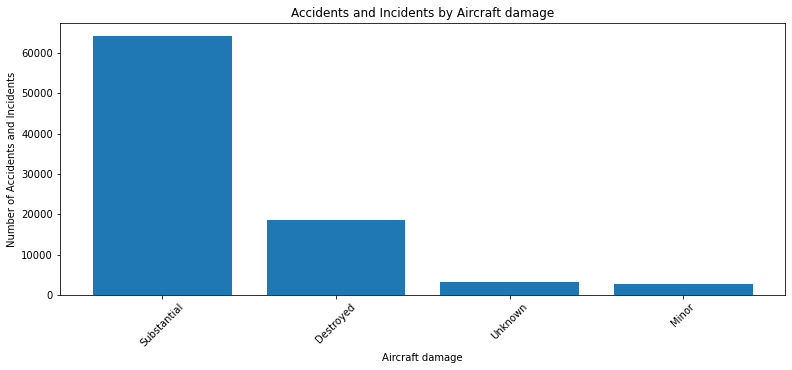

In [23]:
# Plotting barchart for this data
fig, ax = plt.subplots(figsize = (13,5))
ax.bar(x = df1_clean['Aircraft.damage'].value_counts().index, height=df1_clean['Aircraft.damage'].value_counts())
ax.set_title('Accidents and Incidents by Aircraft damage')
ax.set_xlabel('Aircraft damage')
ax.set_ylabel('Number of Accidents and Incidents')
plt.xticks(rotation=45);

### Incidents by Flight.category

In [24]:
# Frequency of incidents by flight category
df1_clean['Flight.category'].value_counts(normalize = True)

Private       0.612202
Other         0.156555
Unknown       0.146182
Commercial    0.073721
Public        0.011340
Name: Flight.category, dtype: float64

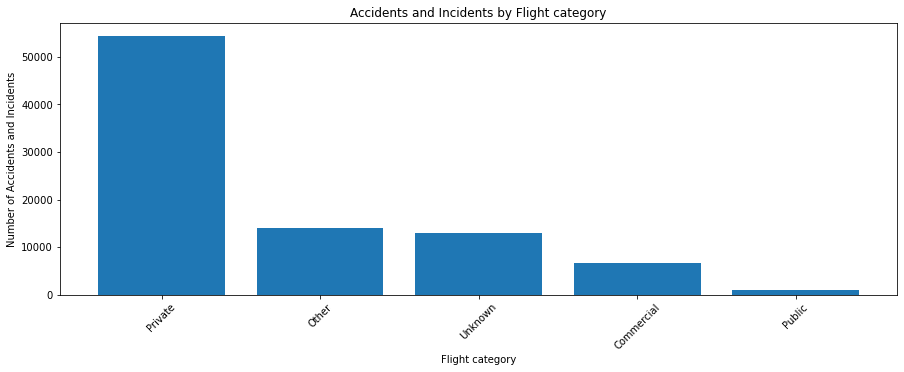

In [25]:
# Plotting barchart for this data
fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x = df1_clean['Flight.category'].value_counts().index, height=df1_clean['Flight.category'].value_counts())
ax.set_title('Accidents and Incidents by Flight category')
ax.set_xlabel('Flight category')
ax.set_ylabel('Number of Accidents and Incidents')
plt.xticks(rotation=45);

### Incidents by phase of flight

In [26]:
# Value counts of phase of flight excluding Unknown values
df1_clean['Broad.phase.of.flight'].value_counts(normalize = True)

Unknown        0.311771
Landing        0.173565
Takeoff        0.140546
Cruise         0.115526
Maneuvering    0.091620
Approach       0.073642
Climb          0.022882
Taxi           0.022027
Descent        0.021229
Go-around      0.015221
Standing       0.010631
Other          0.001339
Name: Broad.phase.of.flight, dtype: float64

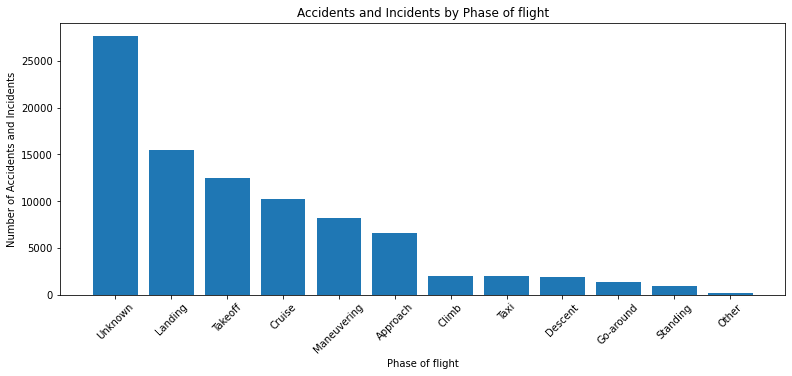

In [27]:
# Plotting barchart for this data, filtering out Unknown values
fig, ax = plt.subplots(figsize = (13,5))
ax.bar(x = df1_clean['Broad.phase.of.flight'].value_counts().index, height=df1_clean['Broad.phase.of.flight'].value_counts())
ax.set_title('Accidents and Incidents by Phase of flight')
ax.set_xlabel('Phase of flight')
ax.set_ylabel('Number of Accidents and Incidents')
plt.xticks(rotation=45);

Ignoring unknown we can see that the most common time for an incident to take place is during complex phases for an aircraft such as landing and takeoff. Naturally, during less complex phases such as standing and go-around there are minimal incidents

## Further EDA

### Damage by Make analysis

In [28]:
# Make a list on the makes on flight with most incidents
most_inc_make = list(df1_clean['Make'].value_counts(normalize = True)[0:5].index)
most_inc_make

['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell']

In [29]:
# Create a dataframe only including incidents with those makes
most_inc_make_df = df1_clean[df1_clean['Make'].isin(most_inc_make)]

In [30]:
# Categories the incidents by damage to the aircraft and break it down by make
most_inc_make_df.groupby(['Make','Aircraft.damage'])['Event.Id'].count()

Make    Aircraft.damage
Beech   Destroyed           1585
        Minor                170
        Substantial         3539
        Unknown               78
Bell    Destroyed            708
        Minor                 47
        Substantial         1900
        Unknown               67
Boeing  Destroyed            170
        Minor                711
        Substantial          739
        Unknown             1125
Cessna  Destroyed           5202
        Minor                387
        Substantial        21268
        Unknown              292
Piper   Destroyed           3428
        Minor                204
        Substantial        11100
        Unknown              138
Name: Event.Id, dtype: int64

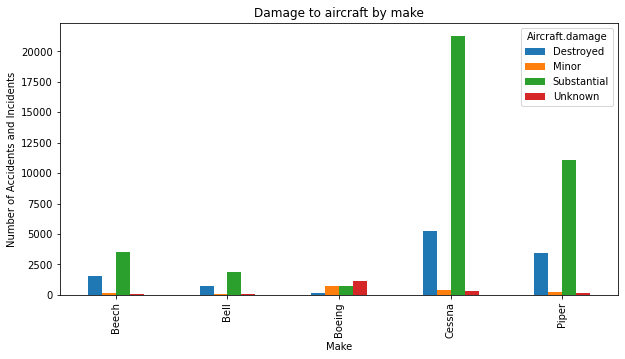

In [31]:
# Plot this data
make_damage_grouped = most_inc_make_df.groupby(['Make','Aircraft.damage'])['Event.Id'].count()
make_damage_grouped.unstack('Aircraft.damage').plot.bar(figsize=(10, 5))
plt.xlabel('Make')
plt.ylabel('Number of Accidents and Incidents')
plt.title('Damage to aircraft by make');

**Findings**

At a brief glance we can see when an incident occurs the damage to the aircraft is most commonly 'Substantial' followed by the aircraft being 'Destroyed'

Only Boeing differs from this where the damage is most commonly 'Substantial' but this data is likely skewed by the proportion of unknown values for Boeing

**Further info**

It would be beneficial to know the proportion of each 'Aircraft.damage' outcome for each 'make'

In [32]:
# Seeing the percentage breakdown of aircraft damage by Make
most_inc_make_df.groupby(['Make','Aircraft.damage'])['Event.Id'].count()/most_inc_make_df.groupby(['Make'])['Event.Id'].count()

Make    Aircraft.damage
Beech   Destroyed          0.295048
        Minor              0.031646
        Substantial        0.658786
        Unknown            0.014520
Bell    Destroyed          0.260103
        Minor              0.017267
        Substantial        0.698016
        Unknown            0.024614
Boeing  Destroyed          0.061931
        Minor              0.259016
        Substantial        0.269217
        Unknown            0.409836
Cessna  Destroyed          0.191609
        Minor              0.014255
        Substantial        0.783381
        Unknown            0.010755
Piper   Destroyed          0.230531
        Minor              0.013719
        Substantial        0.746469
        Unknown            0.009280
Name: Event.Id, dtype: float64

### Make by flight category

In [33]:
category_make_grouped = most_inc_make_df.groupby(['Flight.category', 'Make'])['Event.Id'].count()
category_make_grouped

Flight.category  Make  
Commercial       Beech        78
                 Bell        645
                 Boeing       31
                 Cessna     1157
                 Piper       672
Other            Beech       682
                 Bell        561
                 Boeing       49
                 Cessna     5819
                 Piper      2283
Private          Beech      3873
                 Bell        500
                 Boeing      313
                 Cessna    17514
                 Piper     10657
Public           Beech        29
                 Bell        235
                 Boeing        2
                 Cessna      172
                 Piper        93
Unknown          Beech       710
                 Bell        781
                 Boeing     2350
                 Cessna     2487
                 Piper      1165
Name: Event.Id, dtype: int64

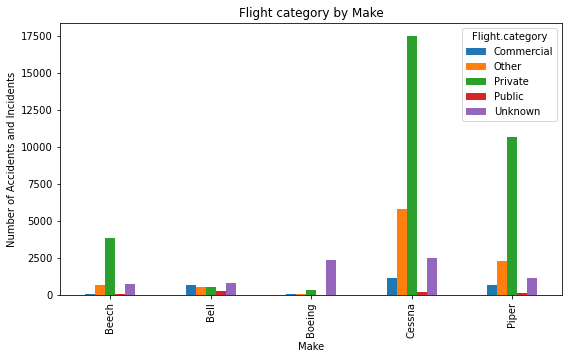

In [34]:
category_make_grouped.unstack('Flight.category').plot.bar(figsize=(9, 5))
plt.xlabel('Make')
plt.ylabel('Number of Accidents and Incidents')
plt.title('Flight category by Make');

**Findings**

Cessna's, Piper's and Beech's aircraft has the most commonly reported incidents  for private and commercial flight suggesting they are the appropriate aircraft for the industry

**Further info**

It would be beneficial to know the proportion of each 'make' for each 'Flight.category'

In [35]:
most_inc_make_df.groupby(['Flight.category', 'Make'])['Event.Id'].count()/most_inc_make_df.groupby(['Flight.category'])['Event.Id'].count()

Flight.category  Make  
Commercial       Beech     0.030197
                 Bell      0.249710
                 Boeing    0.012002
                 Cessna    0.447929
                 Piper     0.260163
Other            Beech     0.072600
                 Bell      0.059719
                 Boeing    0.005216
                 Cessna    0.619438
                 Piper     0.243027
Private          Beech     0.117874
                 Bell      0.015217
                 Boeing    0.009526
                 Cessna    0.533037
                 Piper     0.324345
Public           Beech     0.054614
                 Bell      0.442561
                 Boeing    0.003766
                 Cessna    0.323917
                 Piper     0.175141
Unknown          Beech     0.094755
                 Bell      0.104231
                 Boeing    0.313626
                 Cessna    0.331910
                 Piper     0.155478
Name: Event.Id, dtype: float64

### Phase of flight by Make

In [36]:
make_phase_grouped = most_inc_make_df.groupby(['Make', 'Broad.phase.of.flight'])['Event.Id'].count()
make_phase_grouped

Make    Broad.phase.of.flight
Beech   Approach                  606
        Climb                     177
        Cruise                    733
        Descent                   158
        Go-around                 140
        Landing                   914
        Maneuvering               204
        Other                       6
        Standing                   57
        Takeoff                   841
        Taxi                      107
        Unknown                  1429
Bell    Approach                  138
        Climb                      33
        Cruise                    419
        Descent                    42
        Go-around                   3
        Landing                   220
        Maneuvering               624
        Other                       5
        Standing                   62
        Takeoff                   289
        Taxi                       23
        Unknown                   864
Boeing  Approach                  113
        Climb       

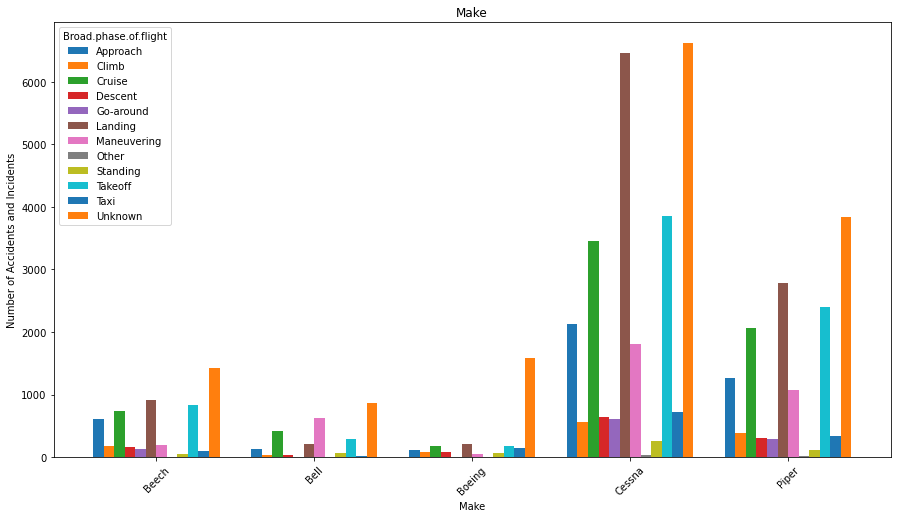

In [37]:
make_phase_grouped.unstack('Broad.phase.of.flight').plot.bar(figsize=(15, 8), width = 0.8)
plt.xlabel('Make')
plt.ylabel('Number of Accidents and Incidents')
plt.title('Make')
plt.xticks(rotation=45);

**Findings**

Across different makes the trend is consistent with the overall trend. The only exception is Bell aircraft with a high number of incidents whilst maneuevering suggest an issue with the aircraft

**Further info**

It would be beneficial to know the proportion of each incidents occuring at each 'Broad.phase.of.flight' for each 'make'

In [38]:
make_phase_grouped/most_inc_make_df.groupby(['Make'])['Event.Id'].count()

Make    Broad.phase.of.flight
Beech   Approach                 0.112807
        Climb                    0.032949
        Cruise                   0.136448
        Descent                  0.029412
        Go-around                0.026061
        Landing                  0.170141
        Maneuvering              0.037975
        Other                    0.001117
        Standing                 0.010611
        Takeoff                  0.156552
        Taxi                     0.019918
        Unknown                  0.266009
Bell    Approach                 0.050698
        Climb                    0.012123
        Cruise                   0.153931
        Descent                  0.015430
        Go-around                0.001102
        Landing                  0.080823
        Maneuvering              0.229243
        Other                    0.001837
        Standing                 0.022777
        Takeoff                  0.106172
        Taxi                     0.008450
    